<a href="https://colab.research.google.com/github/Kexue-Charlene/INDE577/blob/main/Supervised%20Learning/Gradient%20Descent/Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent
Gradient Descent is an optimization algorithm, which is an algorithm that can be used for optimizing our cost function, in order to make our data model more accurate and less error prone. In machine learning, we use gradient descent to update the parameters of our model. Parameters refer to coefficients in Linear Regression and weights in neural networks.





Gradient descent is a optimization algorithm for finding a local minimum of a differentiable function. The extreme right side of graph is the cost function that we are using it to apply gradient descent in order to minimize it. 
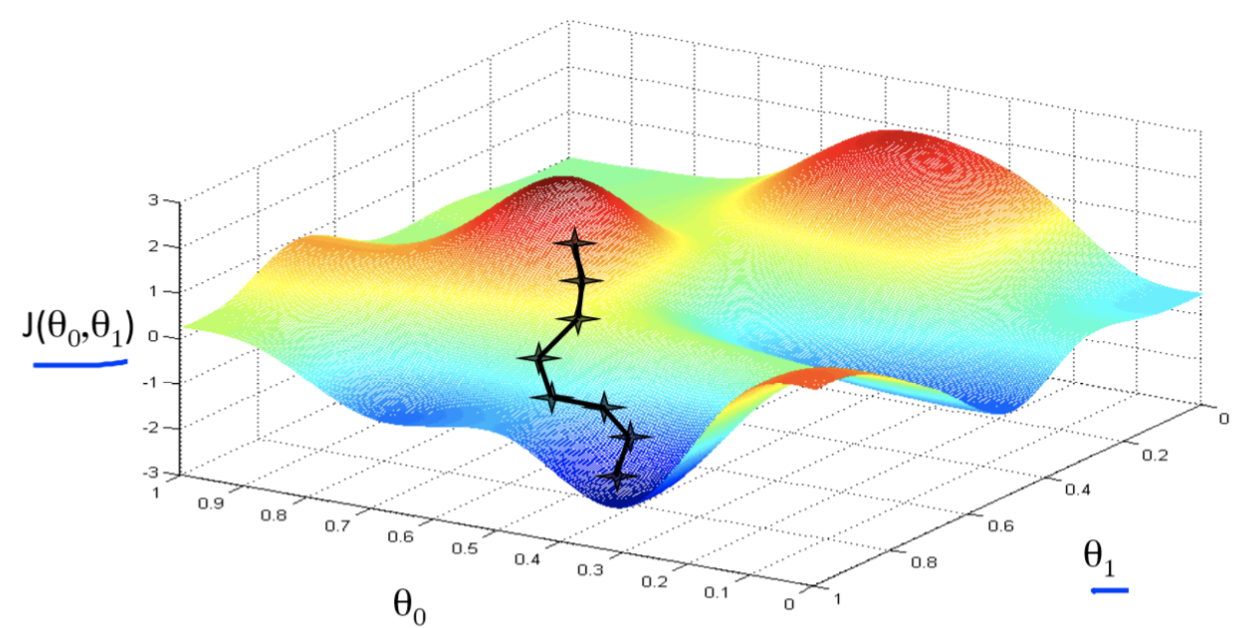


Let's assume we are standing at the top of the hill and we want to get to the foohill as soon as possible. However, we don't want to take risk by taking the unknown tracks in the hill at first, so we get to the foothill from the visible path. The foothill here is called global optimization factor (minimiz cost function). For each step we take was marked by "X" in the hill. The paths we always change repersent changing cost function, so that we can get down of the hill and reach out the minimiaztion cost function successfully. 

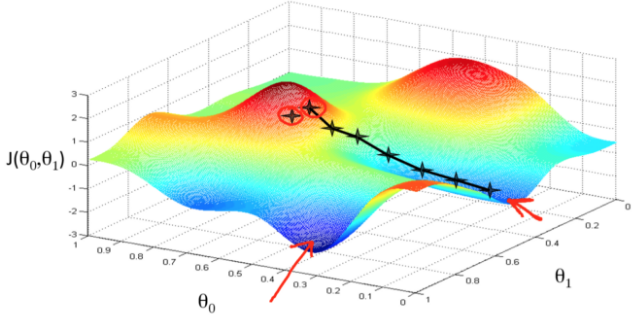

For the purpose of illustration we will use  𝐽(𝑤), function that we want to minimize, as a function of one variable.
Gradient Descent starts at an initial parameter and begins to take values in the steepest downhill direction. Function 𝐽(𝑤,𝑏) is convex, so no matter where we initialize, we should get to the same point or roughly the same point.
After a single step, it ends up a little bit down and closer to a global otpimum because it is trying to take a step downhill in the direction of steepest descent or quickly down low as possible.

The learning rate 𝛼 controls how big step we take on each iteration of Gradient Descent.

Derivative, slope of a function at the point, is basically the update of the change you want to make to the parameters 𝑤. 

$θ_j=θ_j-\alpha \frac{\partial}{\partial \theta_j}J(\theta_0,\theta_1)$ for j=1 and j=0



If  the derivative is positive,  𝑤 gets updated as 𝑤  minus a learning rate 𝛼  times the derivative ” 𝑑𝑤 “
When derivative is positive, so we end up subtracting from 𝑤 and taking a step to the left. Gradient Descent would make your algorithm slowly decrease the parameter if you have started off with this large value of 𝑤.

When the derivative is negative,  the Gradient Descent update would subtract 𝛼 times a negative number, and so we end up slowly increasing 𝑤 and we are making 𝑤 bigger and bigger with each successive iteration of Gradient Descent. So, whether you initialize 𝑤 on the left or on the right, Gradient Descent would move you towards this global minimum.



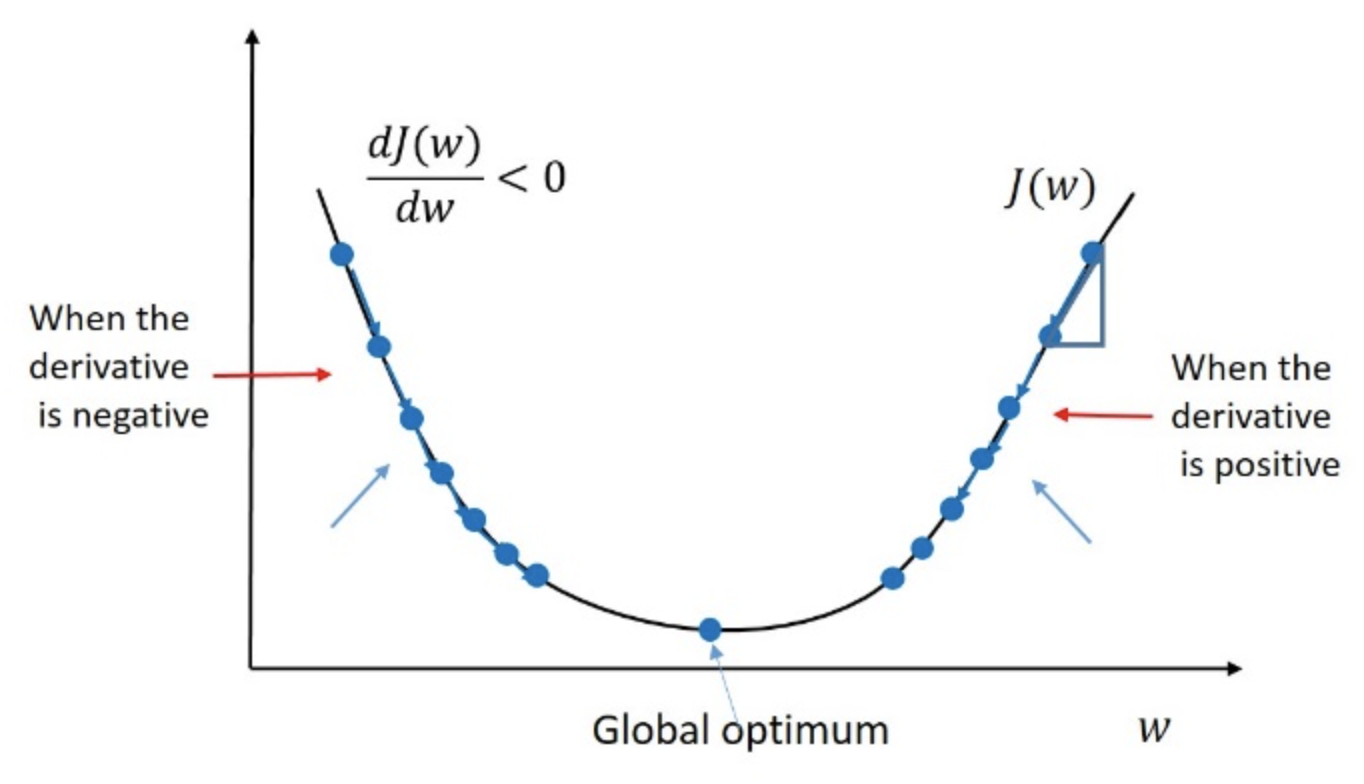

The following packages will be used in this project:
*   matplotlib.pyplot: [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
*   numpy: [documentation](https://numpy.org/devdocs/)
*   pandas: [documentation](https://pandas.pydata.org/docs/)
*   sklearn: [documentation](https://scikit-learn.org/stable/)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

## Data information
The data is from [Here](https://www.kaggle.com/latoyaclarke/gradient-descent). We have two arrays: the input x and output y. Recall .reshape() on x because this array is required to be two-dimensional. Then plot the scatter plot. 


In [ ]:
df=pd.read_csv("data.csv")
X=df.a.to_numpy().reshape((-1, 1))
y=df.b.to_numpy()

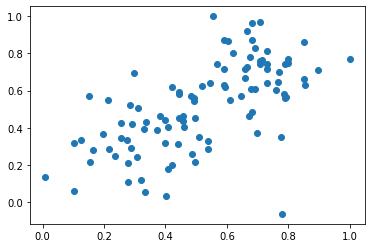

In [ ]:
plt.scatter(X,y)

We import sklearn.linear_model packages. You can find more details in [Here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


In [78]:
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
#y_pred = model.intercept_ + model.coef_ * X

Then we plot the predict linear line into the scatter plot. 

Text(0, 0.5, 'y')

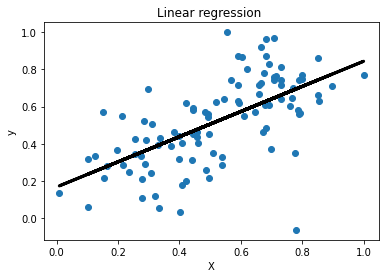

In [79]:
plt.scatter(X,y )
plt.plot(X , y_pred , color = 'k' , lw = 3)
plt.title("Linear regression ")
plt.xlabel("X")
plt.ylabel("y")

## Linear regression with Gradient descent 
Then we apply gradient descent into linear regression. Regression is about determining the best predicted weights, that is the weights corresponding to the smallest residuals.
We define the loss function by following formula:

$Loss=\sum_{i=0}^{n}(\frac{1}{2}(xw+b-y_i)^2)$

The formula for linear regression with gradient descent as below:

$h_\theta(x)=\theta_0+\theta_1x$

$J(\theta_0,\theta_1)=\frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^i)-y^i)$

In [ ]:
def loss(X, y, w, b):
    M = len(y)
    MSE_loss = sum(0.5*(x*w+b-y[i])**2 
               for i,x in enumerate(X))/M
    return MSE_loss

In [ ]:
alpha = 0.12 #learning rate
def gradL(X,y, w,b): 
    M = len(y)
    partial_w = sum((x*w+b-y[i])*x for i,x in enumerate(X))/M
    partial_b = sum((x*w+b-y[i]) for i,x in enumerate(X))/M
    return partial_w, partial_b

Loss at iter10 = [0.01697509]
Loss at iter20 = [0.01660501]
Loss at iter30 = [0.01658708]
Loss at iter50 = [0.01657784]


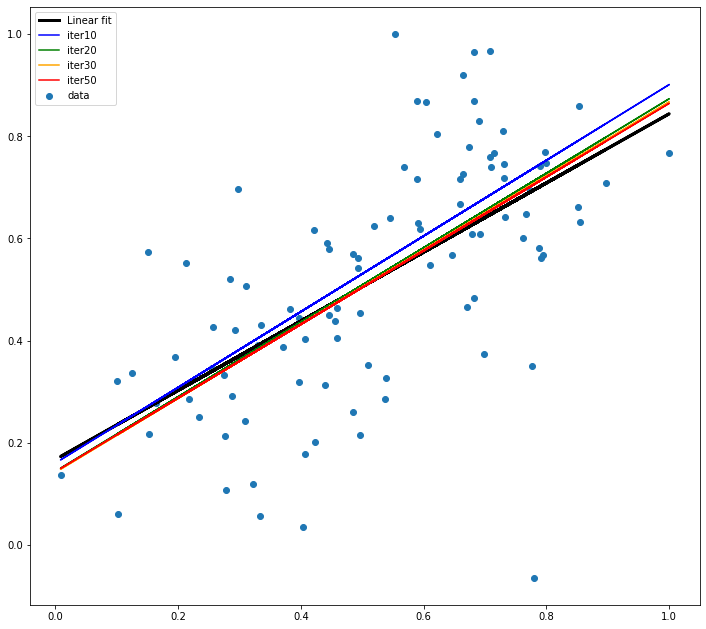

In [ ]:
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]
plt.figure(figsize = (12,11))
plt.scatter(X,y,label = 'data')
plt.plot(X , y_pred , color = 'k' , lw = 3,label = 'Linear fit')

colors = {10:'blue', 20:'green', 30:'orange' , 50:'red'}
for i in range(51):
    dw,db = gradL(X, y, w, b)
    w -= alpha*dw
    b -= alpha*db
    L = loss(X,y,w,b)
    if i in [10, 20, 30, 50]:
        print(f'Loss at iter{i} = {L}')
        plt.plot(X, [w*x+b for x in X], label = f'iter{i}', color = colors[i])
plt.legend()
plt.show()      

The graph shows 5 linear lines which fit linear regression. The black one is not using gradient descent. The blue, green, yellow, red line are using gradient descent with different iteration. When iteration is 50, the loss is the smallest.  

# Reference 
Wikipedia, Gradient descent, Nov 30th.2021.https://en.wikipedia.org/wiki/Gradient_descent

Shreedhar,vellayaraj. Gradient Descent for Linear Regression. Oct 6th.2017. https://medium.com/@Shreedharvellay/gradient-descent-for-linear-regression-8e1389058d07

Data Hacker, #003B Gradient Descent,Oct 22nd, 2018. https://datahacker.rs/gradient-descent/